In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.drop('Loan_ID',axis = 1 , inplace=True)

In [8]:
for i in data.columns:
    print(data[i].value_counts())
    print('\n')

Male      489
Female    112
Name: Gender, dtype: int64


Yes    398
No     213
Name: Married, dtype: int64


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64


Graduate        480
Not Graduate    134
Name: Education, dtype: int64


No     500
Yes     82
Name: Self_Employed, dtype: int64


2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64


0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64


120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: LoanAmount, Length: 203, dtype: int64


360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_A

In [9]:
for col in data.columns:
  if data[col].dtype == 'object' or col =='Credit_History':
    data[col].fillna(data[col].mode()[0], inplace=True)
  else:
    data[col].fillna(data[col].mean(), inplace=True)

In [10]:
data.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
data.shape

(614, 12)

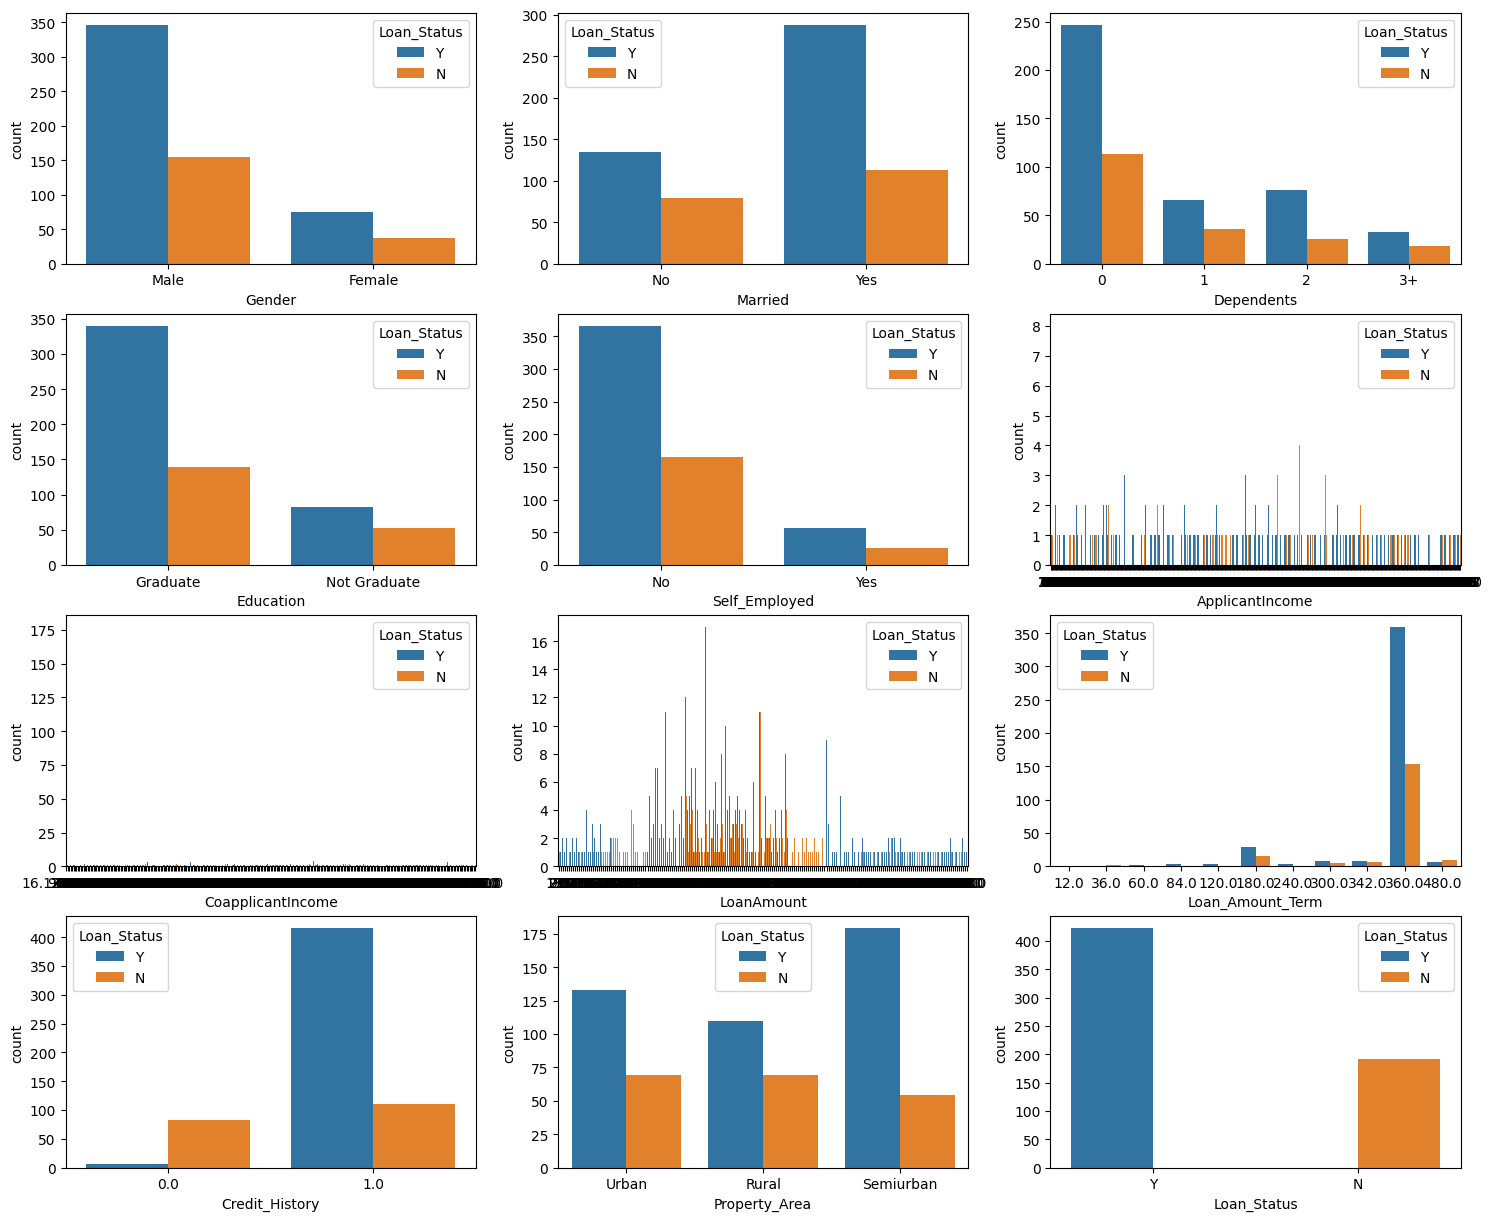

In [12]:
plt.figure(figsize = (18,15))
plotnumber = 1
for col in data.columns:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.countplot(x = data[col], hue=data['Loan_Status'])
        plt.xlabel(col)
        plotnumber +=1

**Data shows you have higher chance of loan approval if:**

*   Your credit history is good : 1
*   You are married
* You live in Semiurban area
* Loan Term duration is 36
* You are not self employed
* You hace graduate degree
* do don't have dependents



In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
for col in data.columns:
  if data[col].dtype == 'object':
    data[col] = le.fit_transform(data[col])

In [15]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


<Axes: >

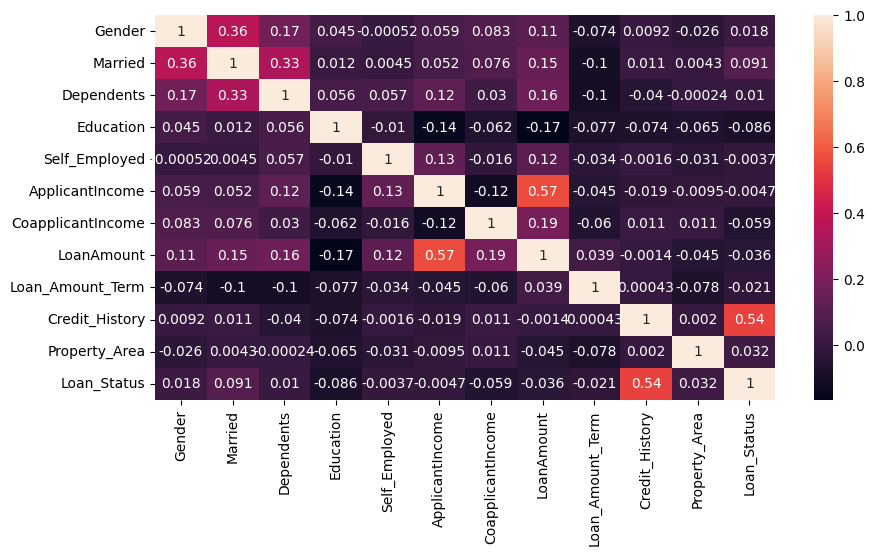

In [16]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot = True)

Apart from credit history, the other features do not have a strong relationship with our targer. Even client's income doesn't seem to play a big part in getting approved.

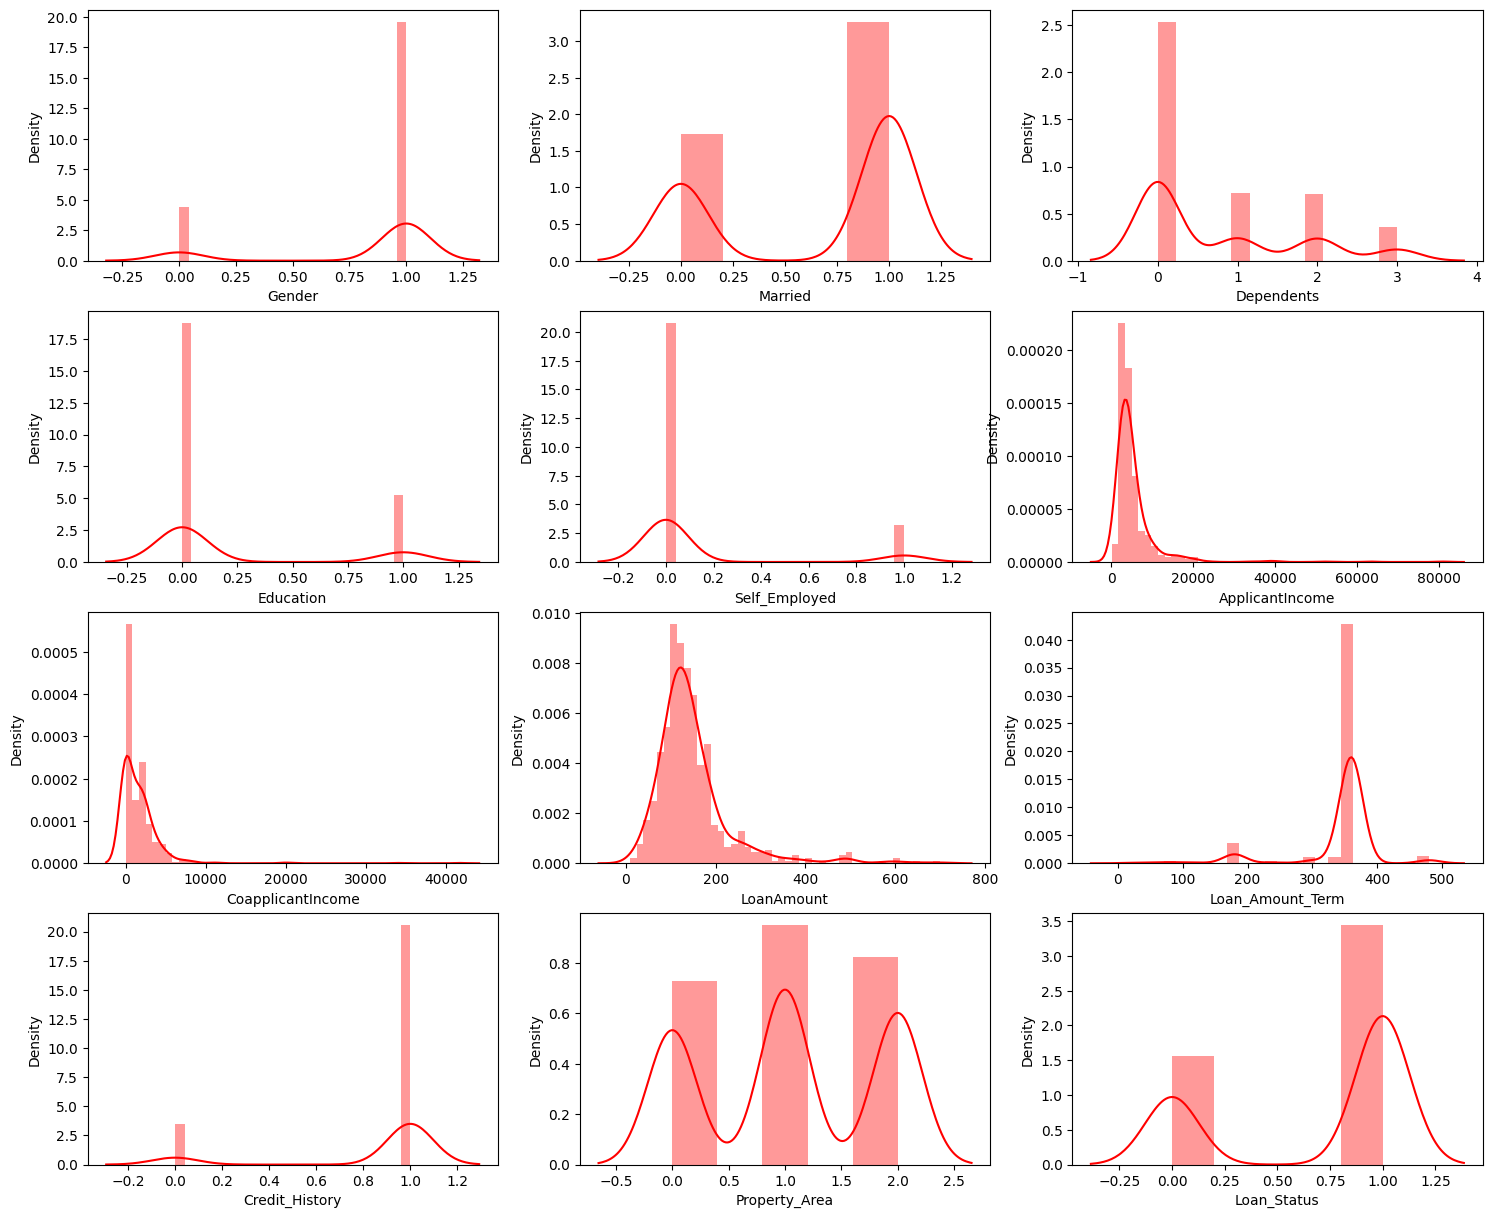

In [17]:
plt.figure(figsize = (18,15))
plotnumber = 1
for col in data.columns:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color='r')
        plt.xlabel(col)
        plotnumber +=1

In [18]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

The loan amount and income columns have skewness which is expected as we there is always a small percentage of people with very high incomes and some applications for large amounts of loan

In [19]:
data['ApplicantIncome'] = np.cbrt(data['ApplicantIncome'])
data['CoapplicantIncome'] = np.cbrt(data['CoapplicantIncome'])
data['LoanAmount'] = np.cbrt(data['LoanAmount'])

In [20]:
data.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      2.083638
CoapplicantIncome    0.196726
LoanAmount           0.832841
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

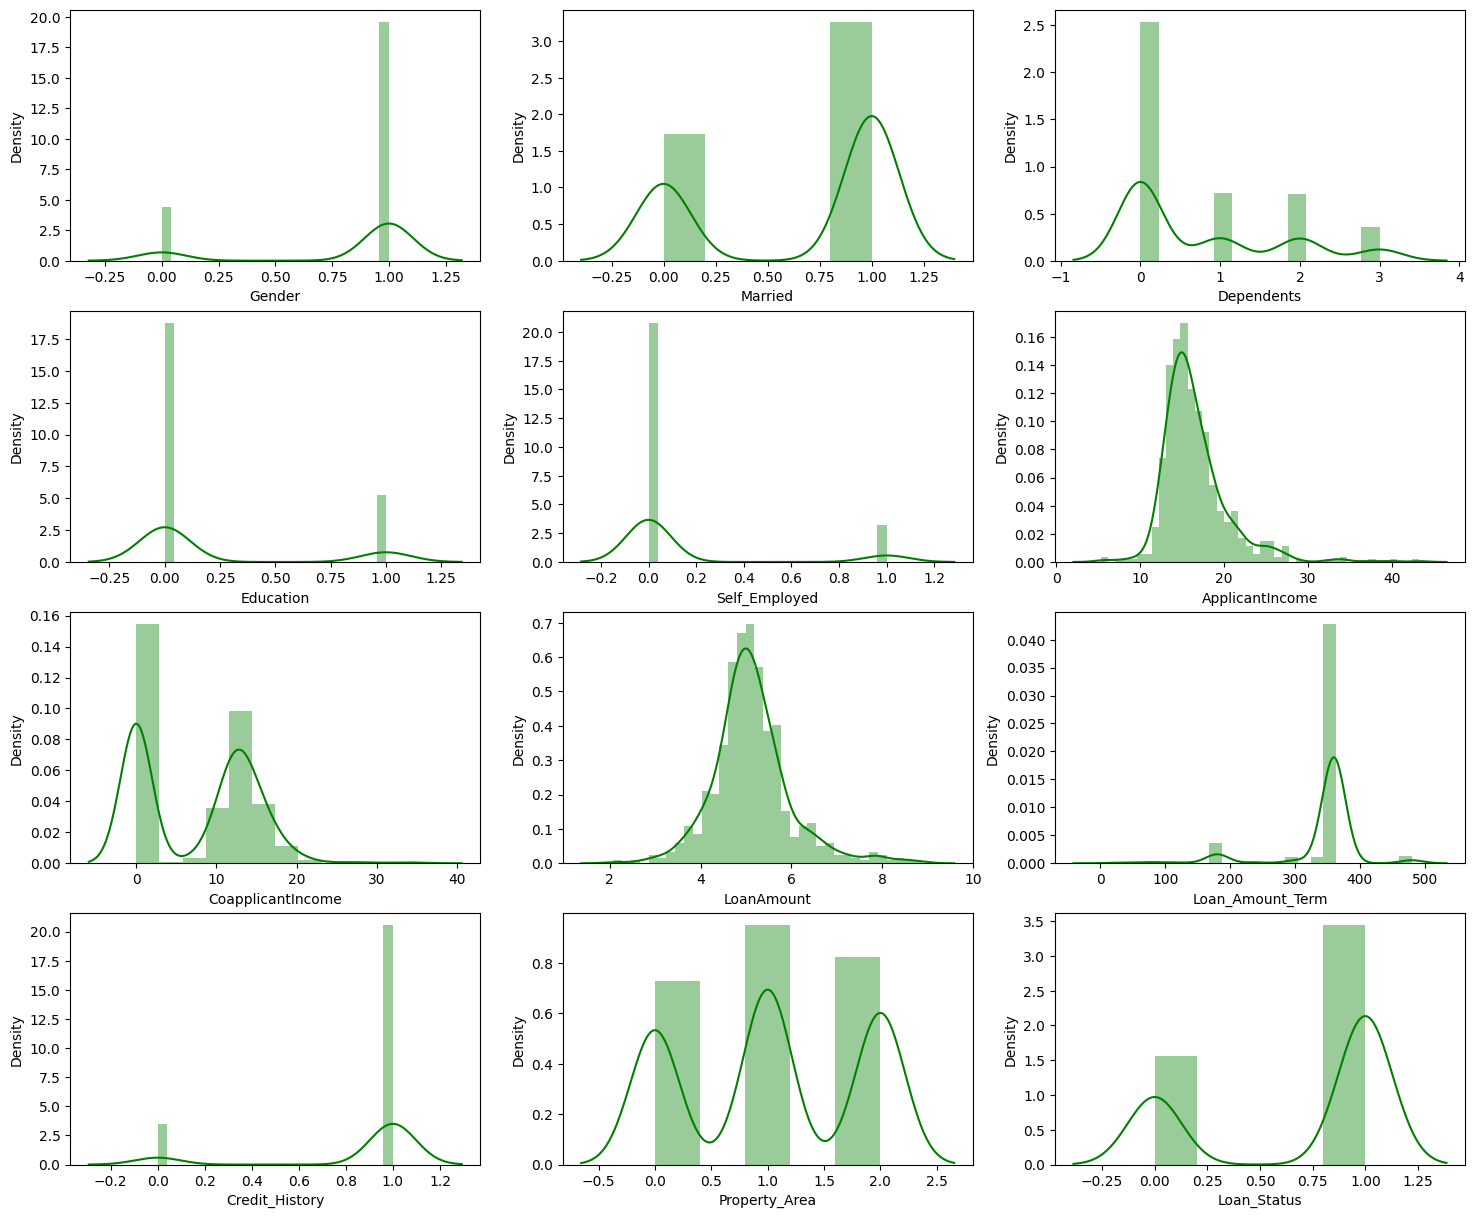

In [21]:
plt.figure(figsize = (18,15))
plotnumber = 1
for col in data.columns:
    if plotnumber<=12:
        ax = plt.subplot(4,3,plotnumber)
        sns.distplot(data[col], color='g')
        plt.xlabel(col)
        plotnumber +=1

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
x = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [59]:
scaler = StandardScaler()

x_scaled = pd.DataFrame(scaler.fit_transform(x), columns= x.columns)

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [60]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,1.197478,Gender
1,1.360821,Married
2,1.179086,Dependents
3,1.070627,Education
4,1.041134,Self_Employed
5,2.044846,ApplicantIncome
6,1.528743,CoapplicantIncome
7,1.848321,LoanAmount
8,1.049654,Loan_Amount_Term
9,1.008359,Credit_History


As seen before we have some multicolinearity between loan amount and applicant income which is an expected correlation.

In [61]:
x_scaled.drop(['LoanAmount'], axis=1, inplace=True)

In [62]:
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(x_scaled.values,i) for i in range(len(x_scaled.columns))]
vif['Features'] = x_scaled.columns
vif

,VIF,Features
0,1.197357,Gender
1,1.358552,Married
2,1.165488,Dependents
3,1.066862,Education
4,1.040686,Self_Employed
5,1.253729,ApplicantIncome
6,1.284966,CoapplicantIncome
7,1.031662,Loan_Amount_Term
8,1.007623,Credit_History
9,1.019509,Property_Area


In [63]:
y.value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

We need to balance the Target before modeling

In [53]:
from imblearn.over_sampling import SMOTE

In [64]:
sm = SMOTE()
x1, y1 = sm.fit_resample(x_scaled,y)

In [65]:
y1.value_counts()

1    422
0    422
Name: Loan_Status, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [66]:
MaxAccu = 0
MaxRS = 0
for i in range(1,300):
  x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=i)
  LR = LogisticRegression()
  LR.fit(x_train,y_train)
  pred = LR.predict(x_test)
  acc = accuracy_score(y_test,pred)
  if acc > MaxAccu:
    MaxAccu = acc
    MaxRS = i
print('MAximum Accuracy:',MaxAccu,'\n', 'Best Random State:',MaxRS)

MAximum Accuracy: 0.7598425196850394 
 Best Random State: 5


In [67]:
x_train,x_test,y_train,y_test = train_test_split(x1,y1,test_size=0.30,random_state=MaxRS)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve
from sklearn.model_selection import cross_val_score

**Random Forest**

In [69]:
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)
RFCpred = RFC.predict(x_test)
print(accuracy_score(y_test,RFCpred))
print(confusion_matrix(y_test,RFCpred))
print(classification_report(y_test,RFCpred))

0.8346456692913385
[[ 97  21]
 [ 21 115]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       118
           1       0.85      0.85      0.85       136

    accuracy                           0.83       254
   macro avg       0.83      0.83      0.83       254
weighted avg       0.83      0.83      0.83       254



**Logistic Regression**

In [70]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
LRpred = LR.predict(x_test)
print(accuracy_score(y_test,LRpred))
print(confusion_matrix(y_test,LRpred))
print(classification_report(y_test,LRpred))

0.7598425196850394
[[ 62  56]
 [  5 131]]
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       118
           1       0.70      0.96      0.81       136

    accuracy                           0.76       254
   macro avg       0.81      0.74      0.74       254
weighted avg       0.80      0.76      0.75       254



**Support Vector**

In [71]:
svc = SVC()
svc.fit(x_train,y_train)
svcpred = svc.predict(x_test)
print(accuracy_score(y_test,svcpred))
print(confusion_matrix(y_test,svcpred))
print(classification_report(y_test,svcpred))

0.7401574803149606
[[ 76  42]
 [ 24 112]]
              precision    recall  f1-score   support

           0       0.76      0.64      0.70       118
           1       0.73      0.82      0.77       136

    accuracy                           0.74       254
   macro avg       0.74      0.73      0.73       254
weighted avg       0.74      0.74      0.74       254



**Gradient Boosting**

In [72]:
GBC = GradientBoostingClassifier()
GBC.fit(x_train,y_train)
GBCpred = GBC.predict(x_test)
print(accuracy_score(y_test,GBCpred))
print(confusion_matrix(y_test,GBCpred))
print(classification_report(y_test,GBCpred))

0.8070866141732284
[[ 91  27]
 [ 22 114]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       118
           1       0.81      0.84      0.82       136

    accuracy                           0.81       254
   macro avg       0.81      0.80      0.81       254
weighted avg       0.81      0.81      0.81       254



**Bagging**

In [73]:
BC = BaggingClassifier()
BC.fit(x_train,y_train)
BCpred = BC.predict(x_test)
print(accuracy_score(y_test,BCpred))
print(confusion_matrix(y_test,BCpred))
print(classification_report(y_test,BCpred))

0.8228346456692913
[[103  15]
 [ 30 106]]
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       118
           1       0.88      0.78      0.82       136

    accuracy                           0.82       254
   macro avg       0.83      0.83      0.82       254
weighted avg       0.83      0.82      0.82       254



**Cross Validation**

In [74]:
score = cross_val_score(RFC, x1,y1)
print(score)
print(score.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,RFCpred)-score.mean())

[0.77514793 0.78106509 0.84023669 0.87573964 0.89880952]
0.83419977458439
Difference Between score mean and accuracy score: 0.0004458947069485575


In [75]:
score1 = cross_val_score(LR, x1,y1)
print(score1)
print(score1.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,LRpred)-score1.mean())

[0.68639053 0.71597633 0.71005917 0.66863905 0.66071429]
0.6883558748943364
Difference Between score mean and accuracy score: 0.07148664479070299


In [76]:
score2 = cross_val_score(svc, x1,y1)
print(score2)
print(score2.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,svcpred)-score2.mean())

[0.72781065 0.75147929 0.73372781 0.73372781 0.73809524]
0.7369681600450833
Difference Between score mean and accuracy score: 0.0031893202698773937


In [77]:
score3 = cross_val_score(GBC, x1,y1)
print(score3)
print(score3.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,GBCpred)-score3.mean())

[0.68047337 0.73964497 0.81065089 0.83431953 0.8452381 ]
0.782065370526909
Difference Between score mean and accuracy score: 0.025021243646319302


In [78]:
score4 = cross_val_score(BC, x1,y1)
print(score4)
print(score4.mean())
print('Difference Between score mean and accuracy score:', accuracy_score(y_test,BCpred)-score4.mean())

[0.69822485 0.74556213 0.81065089 0.78106509 0.85714286]
0.7785291631445478
Difference Between score mean and accuracy score: 0.044305482524743534


Random forest is the best model

In [79]:
from sklearn import metrics

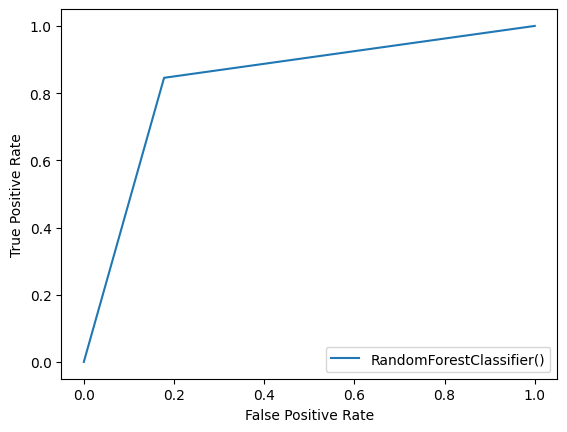

In [80]:
fpr,tpr,thresholds = metrics.roc_curve(y_test,RFCpred)
roc_auc = metrics.auc(fpr,tpr)
rfcurve = metrics.RocCurveDisplay(fpr = fpr, tpr = tpr, estimator_name = RFC)
rfcurve.plot()

**Tuning Parameters**

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
param = {'criterion':['gini', 'entropy', 'log_loss'],'max_features':['sqrt', 'log2', 'None'],'max_depth': [1, 3, 10, 50,100]}
gscv = GridSearchCV(RFC,param,cv=5)
gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 10, 50, 100],
                         'max_features': ['sqrt', 'log2', 'None']})

In [83]:
gscv.best_params_

{'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt'}

In [84]:
model = RandomForestClassifier(criterion= 'entropy', max_depth= 50, max_features= 'sqrt')
model.fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

0.8228346456692913
[[ 95  23]
 [ 22 114]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       118
           1       0.83      0.84      0.84       136

    accuracy                           0.82       254
   macro avg       0.82      0.82      0.82       254
weighted avg       0.82      0.82      0.82       254



In [85]:
import joblib

In [86]:
joblib.dump(model,'loan_approval.pk1')

['loan_approval.pk1']

In [87]:
df = pd.DataFrame()
actual = np.array(y_test)
df['Actual'] = actual
df['Prediction'] = pred
df

,Actual,Prediction
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
249,0,1
250,1,1
251,0,0
252,1,0
